In [1]:
from PID_controller import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# PID controller
<img src="PID.png" style ="height: 400px;width: 900px">

A PID controller involves three separate constant parameters: the proportional, the integral and derivative values.
The Laplace transform of a PID-controller is: <br>
$C(s) = K_p + \frac{K_I}{s} + K_Ds$

## Open-loopsystem

In [2]:
# Enter numerator
num = [10]
# Enter denominator
den = [100,1]
# Defining P(s)
P = control.tf(num,den)

In [3]:
#Define min/max for K
K_min,K_max = 0,50

## Closed-loopsystem


400 s^2 + 350 s + 410
---------------------
500 s^2 + 351 s + 410



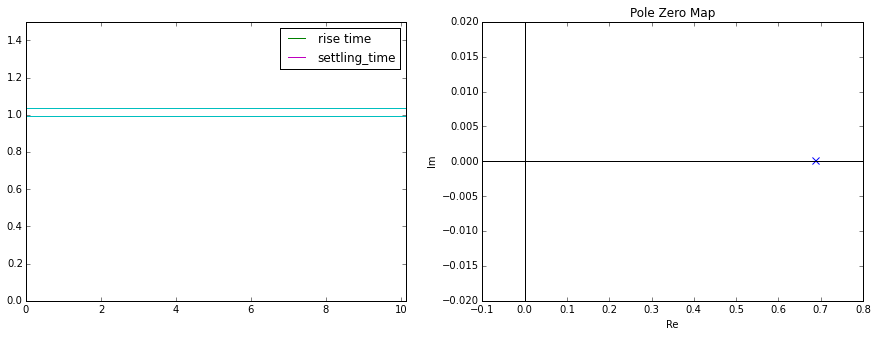

Rise time:  None
Steady_state:  1.01449275362
Overshoot:  None
Peak time:  None
Setlling time:  None


In [4]:
% matplotlib inline
def PID(KP,KI,KD):
    if KP !=0 or KI!= 0 or KD !=0:
        # Defining C = KP + KI/p + KD*p
        C = control.tf([KP],[1]) + control.tf([KI],[1,0]) + control.tf([KD,0],[1])
        # Defining closed-loop system
        c_l_sys = control.feedback(C*P,1)
        print c_l_sys
        # Calculate stepresponce of the c_l_system
        y,t = control.step(c_l_sys)
        # Calculate peak and time to reach peak
        y_max,peak_time = calculate_peak(y,t)
        # Calculate steady state
        steady_state= calculate_steady_state(C*P)
        # Calculate overshoot
        overshoot = y_max - steady_state
        # Calculate rise time.
        rise_time = calculate_rise_time(y,t,steady_state)
        # Defining sigma
        sigma = 0.02
        # Calculate settling time
        settling_time = calculate_settling_time(y,t,steady_state,sigma)
        # Draw step response
        draw_step_response(y,t,y_max,peak_time,steady_state,overshoot,rise_time,settling_time,sigma)
        # Draw zero pole diagram
        draw_zero_pole_diagram(c_l_sys)
        # Print output
        print_data(peak_time,steady_state,overshoot,rise_time,settling_time,sigma)
    
def calculate_peak(y,t):
    # Calculate maximum y
    y_max = np.amax(y)
    itemindex = np.where(y==y_max)[0][0]
    # Bepaal bijhorende t
    peak_t = t[itemindex]
    return y_max,peak_t

def calculate_steady_state(PC):
    poles= control.pole(PC)
    # Bereken steady state error using error = 1/(1+K*(Prod(-n_i)/Prod(-p_i))
    if  not 0 in poles:
        DCgain = control.dcgain(PC).item(0)
        steady_state_error = 1/(1+DCgain) 
    else:
        steady_state_error = 0
    # Steady state is desired output - steady state error
    return 1 - steady_state_error

def calculate_rise_time(y,t,steady_state):
    # Calculate time to reach the steady state for the first time
    for i in range(1,len(y)):
        if y[i-1]<steady_state and y[i]>=steady_state:
            return t[i]
def calculate_settling_time(y,t,steady_state,sigma):
    # Calculate the settling time
    if y[-1]> (steady_state + sigma) or y[-1] < (steady_state - sigma):
        return None
    else:
        for i in range(len(y)-1,-1,-1):
            if y[i]> (steady_state + sigma) or y[i] < (steady_state - sigma):
                break
        
        return t[i+1]
        
interact(PID,KP=(K_min,K_max,1),KI=(K_min,K_max,1),KD=(K_min,K_max,1))